### Linear Regression ile Ev Fiyatı Tahmin Uygulaması 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [6]:
df = pd.read_csv("HousingData.csv")
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df2 = df.dropna()
df2.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Scikit-Learn -> ML Algoritmalarını imo-plemente edebildiğimiz kütüphane

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#ML algoritmları CPU da çalışır
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Prediction
y_pred = model.predict(X_test)
y_pred

# Modelin performansını ölç
# MAE, MSE, RMSE

# Mean Absolute Error -> Ortalama Mutlak hata
# Mean Square Error -> Hataların karesini alarak toplar ve ortalamasını alır. 
# Root Mean Squared Error -> MSE'nin karekökünün alınmış hali.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
# mae # Program ortalama +- 3.14 dolar sapma (hata) yapıyor.

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse # Daha düşük skor = Daha iyi model

# MAE => Ortalama kaç birim sapma var? +- 3.14K dolar
# MSE => MAE ile karşılaştırıp farka göre modelin ne kadar büyük hatalar yaptığını gözlemlenir. (Outlier, Aykırı Değer)

(3.1410525671084675, 21.818457953526064, 4.67102322339828)

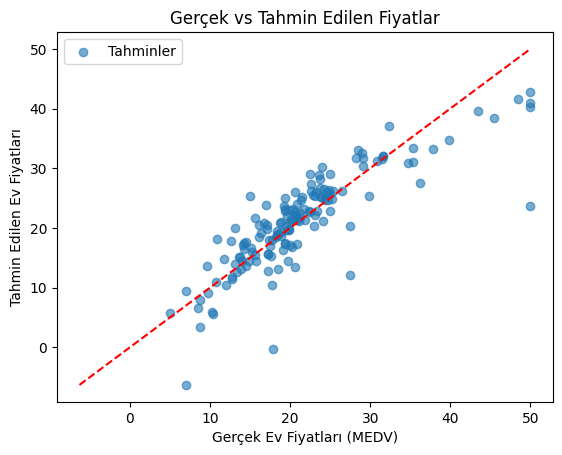

In [25]:
plot.scatter(y_test, y_pred, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları (MEDV)")
plot.ylabel("Tahmin Edilen Ev Fiyatları")

min_val = min(y_test.min(), y_pred.min()) # en küçük değer
max_val = max(y_test.max(), y_pred.max()) # en büyük değer

plot.plot([min_val, max_val], [min_val,max_val], color="red", linestyle="--")
plot.title("Gerçek vs Tahmin Edilen Fiyatlar")
plot.legend()

In [26]:
coef_df =pd.DataFrame(model.coef_, X.columns, columns = ["Katsayı"]) # Coefficients
coef_df

# - (Negatif) -> Bu değişken artıkça ev fiyatı düşüyor. (Ters orantı)
# + (Pozitif) -> Bu değişken artıkça ev fiyatı artıyor. (Düz Orantı)

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [27]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.27


In [28]:
new_house = np.array(
    [
        [ 0.09178,0.0, 11.08, 0, 0.510, 6.416, 68.518, 2.6463, 5,296,16.6,395.50,9.04 ]
    ]
)

In [29]:
f"Eğitimde kullanılan özellik sayısı {X.shape[1]}"
f"Yeni verinin özellik sayısı {new_house.shape[1]}"

'Yeni verinin özellik sayısı 13'

In [30]:
feature_names = [ "CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT" ]
new_house_df = pd.DataFrame(new_house, columns=feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,11.08,0.0,0.51,6.416,68.518,2.6463,5.0,296.0,16.6,395.5,9.04


In [31]:
predicted_price = model.predict(new_house_df)
f"Girilen değerler için tahmin edilen fiyat: {predicted_price}"

'Girilen değerler için tahmin edilen fiyat: [28.94689911]'